In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\VENKATESH\Desktop\Projects 1\Abestinism.xlsx')
df.head()
                   

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info

<bound method DataFrame.info of      ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0    11                  26                 7                3        1   
1    36                   0                 7                3        1   
2     3                  23                 7                4        1   
3     7                   7                 7                5        1   
4    11                  23                 7                5        1   
..   ..                 ...               ...              ...      ...   
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Servi

In [4]:
df.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [5]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df.shape

(740, 21)

In [7]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

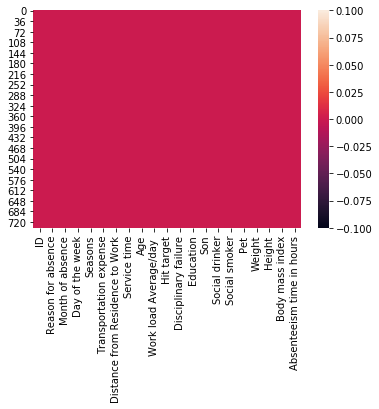

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


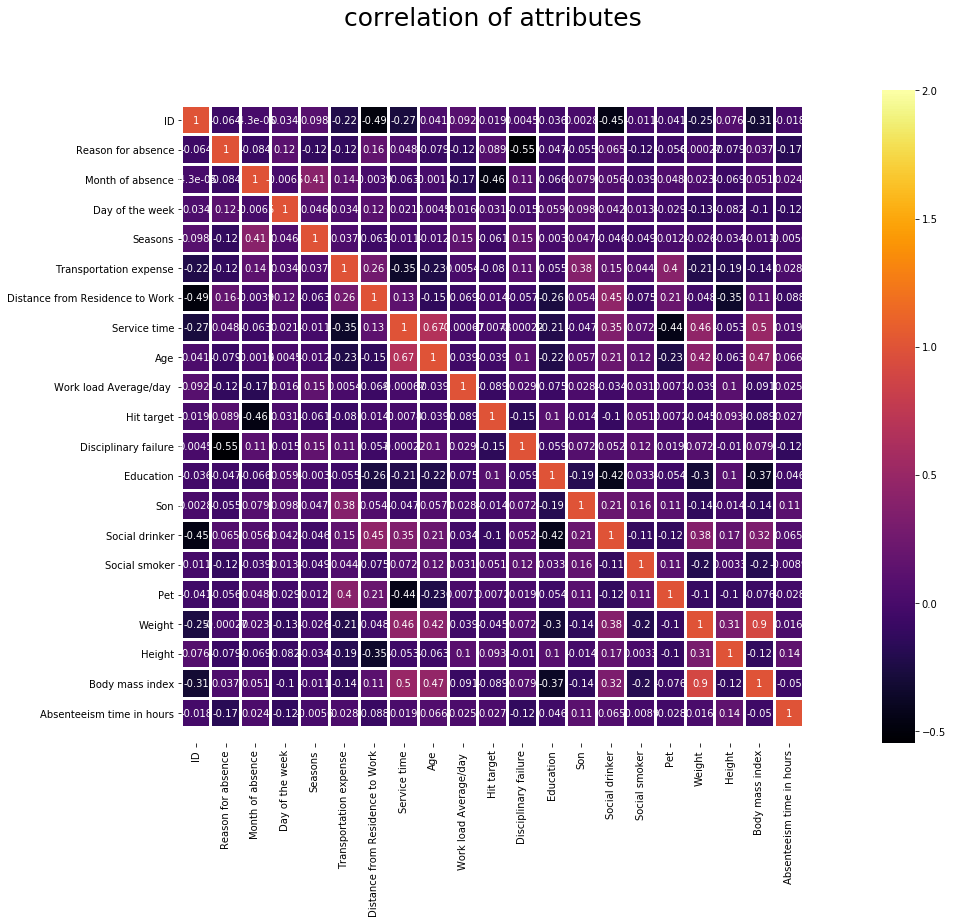

In [10]:
# Heat map represents of correlation between the various attributes
colormap=plt.cm.inferno # color range to be used in heat map
plt.figure(figsize=(28,12))
plt.title('correlation of attributes',y=1.09, size=25)
sns.heatmap(df.corr(),linewidths=2,vmax=2,square=True,cmap=colormap,linecolor='white',annot=True)

# snippet to overcome the top and bottom row breaking cells(matplotlib version specfic issue)
b,t = plt.ylim()# discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # subtract 0.5 from the top
plt.ylim(b,t)# update the ylim(bottom,top)values
plt.show()

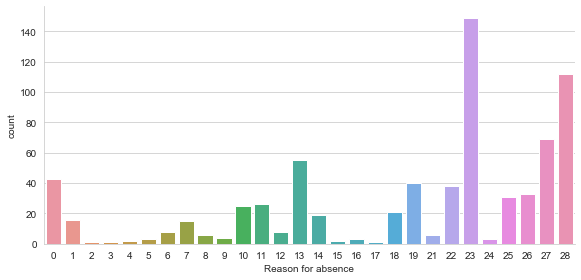

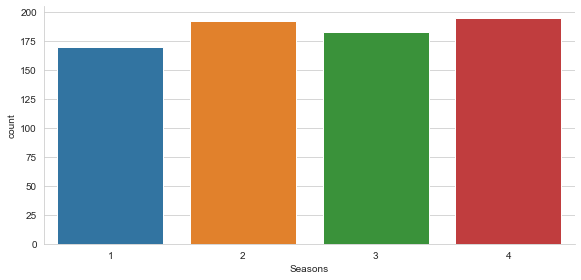

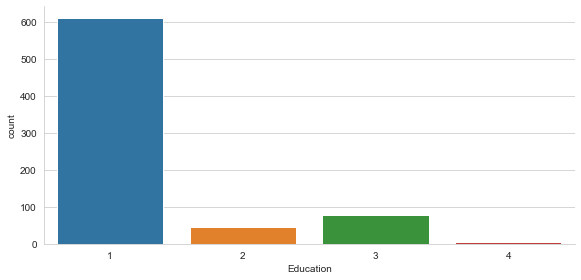

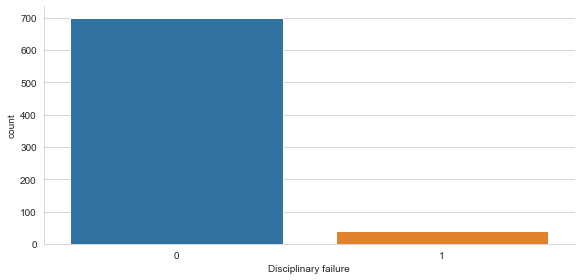

In [11]:
#Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=df, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

Text(0.5, 1.0, 'Weight Distribution')

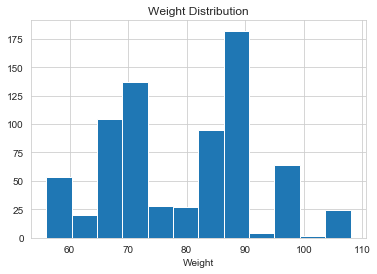

In [12]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

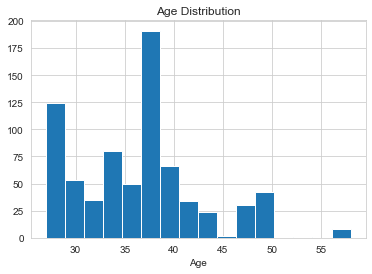

In [13]:
#Check the distribution of numerical data using histogram
plt.hist(data=df, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

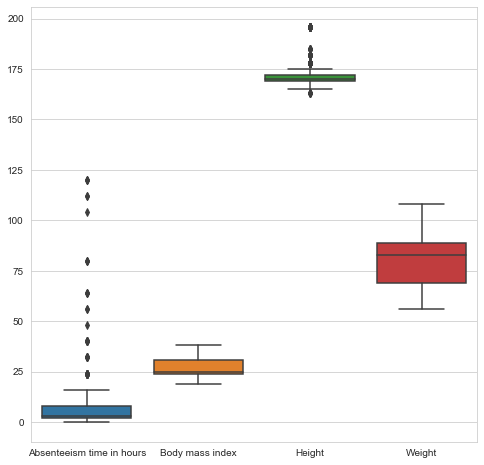

In [15]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

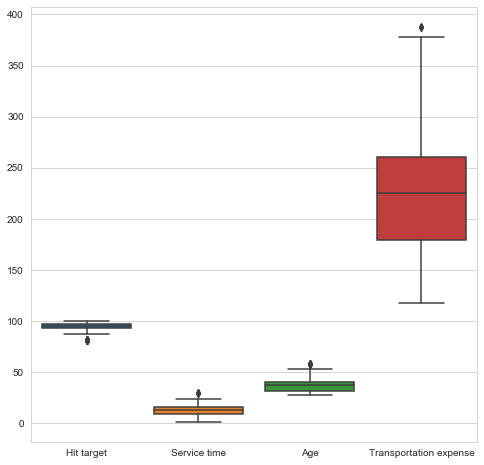

In [16]:
#Check for outliers in data using boxplot
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [17]:
# Lets check for Outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(740, 21)
(576, 21)


In [19]:
# Sepearting target and input variables
import numpy as np
x=df_final.drop(columns=['Absenteeism time in hours'])
y=df_final[["Absenteeism time in hours"]]

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=55,test_size=0.20)

In [21]:
#print the shape of the train and test data values

print(train_x.shape)

print(train_y.shape)

print(test_x.shape)

print(test_y.shape)

(460, 20)
(460, 1)
(116, 20)
(116, 1)


In [24]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.22413793103448276
[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  2  1  0  0  1  0  0  1  2]
 [ 4  1  9  4  6  0  0  1  2  0  0  1]
 [ 1  0  5  2  6  2  0  1  1  0  0  0]
 [ 0  0  1  2  1  1  0  2  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  3  1  2 12  5  5  2  9]
 [ 0  0  0  0  1  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  1  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         9
           2       0.50      0.32      0.39        28
           3       0.18      0.11      0.14        18
           4       0.06      0.10      0.07        10
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.71      0.29      0.41        42
          16       0.00 

In [25]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.3620689655172414
[[ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1
           8       0.36      1.00      0.53        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.36       116


In [26]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
predsvc=dtc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.39655172413793105
[[ 2  3  1  1  0  2  0  0  0  0]
 [ 4 15  6  1  0  1  1  0  0  0]
 [ 2  5  7  2  0  2  0  0  0  0]
 [ 0  1  2  3  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 5  2  7  3  0 19  2  4  0  0]
 [ 0  0  0  1  0  1  0  0  0  0]
 [ 0  0  2  0  0  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.14      0.22      0.17         9
           2       0.58      0.54      0.56        28
           3       0.28      0.39      0.33        18
           4       0.27      0.30      0.29        10
           5       0.00      0.00      0.00         1
           8       0.59      0.45      0.51        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.40       116

In [27]:
svc=KNeighborsClassifier()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.3706896551724138
[[ 3  1  0  1  0  4  0  0  0  0]
 [ 2 12  6  2  0  6  0  0  0  0]
 [ 2  7  6  2  0  1  0  0  0  0]
 [ 0  3  2  3  0  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 3 11  6  3  0 19  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0]
 [ 1  0  1  0  0  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.23      0.33      0.27         9
           2       0.35      0.43      0.39        28
           3       0.27      0.33      0.30        18
           4       0.25      0.30      0.27        10
           5       0.00      0.00      0.00         1
           8       0.54      0.45      0.49        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.37       116


In [28]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

0.3620689655172414
[[ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1
           8       0.36      1.00      0.53        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.36       116


In [29]:
def svmkernel(ker):
    svc=SVC(kernel='poly')
    svc.fit(train_x,train_y)
    svc.score(train_x,train_y)
    predsvc=svc.predict(test_x)
    print(accuracy_score(test_y,predsvc))
    print(confusion_matrix(test_y,predsvc))
    print(classification_report(test_y,predsvc))

In [30]:
svmkernel('rbf')

0.3620689655172414
[[ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1
           8       0.36      1.00      0.53        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.36       116


In [31]:
svmkernel('poly')

0.3620689655172414
[[ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1
           8       0.36      1.00      0.53        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.36       116


In [32]:
df1=pd.DataFrame(predsvc)
df1.to_csv('svc_predicition.csv')

In [33]:
from sklearn.model_selection import cross_val_score
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.27586207 0.12173913 0.28695652 0.17391304 0.23478261]
0.2186506746626687
0.06259772316495088


In [34]:
sv=SVC()
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.27586207 0.12173913 0.28695652 0.17391304 0.23478261]
0.2186506746626687
0.06259772316495088


In [35]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9800000000000001
linear
{'C': 1, 'kernel': 'linear'}


In [36]:
from sklearn import svm,datasets
from sklearn.model_selection import GridSearchCV
iris=datasets.load_iris()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(iris.data,iris.target)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [37]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [38]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]


for m in model:
    m.fit(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.3793103448275862
[[ 2  3  1  1  0  2  0  0  0  0]
 [ 4 14  5  2  0  3  0  0  0  0]
 [ 2  4  7  2  0  3  0  0  0  0]
 [ 0  1  2  3  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 6  3  6  5  0 18  1  3  0  0]
 [ 0  0  0  1  0  1  0  0  0  0]
 [ 0  0  2  0  0  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.13      0.22      0.17         9
           2       0.56      0.50      0.53        28
           3       0.30      0.39     

In [39]:
import pickle
filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
# Load the model from the disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([24,  2,  3,  2,  8,  3,  2,  8,  2,  3,  3,  8,  3,  3,  8,  2, 16,
        2,  3,  4,  2,  8,  3,  3, 16,  4,  3,  1,  8,  8, 24,  1,  8,  1,
        2,  2,  8,  1,  1,  3,  4,  8,  4, 24,  1,  1,  3,  1,  8,  4,  2,
        8,  2,  4,  2,  1,  3,  4,  4,  8,  3,  3,  2,  8,  8,  1,  2,  1,
        1,  8,  8,  8,  2,  3, 16,  8,  3,  2,  2,  8,  8,  2,  8,  2,  3,
        4,  8, 16,  1,  2,  8,  3,  3,  3,  4,  8,  3,  3,  2,  2,  8,  2,
        8,  8,  8,  2,  1,  3, 24,  8,  4,  8,  2,  3,  8,  2],
      dtype=int64)